In [2]:
import numpy as np
import theano 
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
from keras import regularizers


In [4]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

l1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
l2 = MaxPooling2D((2, 2), padding='same')(l1)
l3 = Conv2D(8, (3, 3), activation='relu', padding='same')(l2)
l4 = MaxPooling2D((2, 2), padding='same')(l3)
l5 = Conv2D(8, (3, 3), activation='relu', padding='same')(l4)
encoded = MaxPooling2D((2, 2), padding='same')(l5)

d1 = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
d2 = UpSampling2D((2, 2))(d1)
d3 = Conv2D(8, (3, 3), activation='relu', padding='same')(d2)
d4 = UpSampling2D((2, 2))(d3)
d5 = Conv2D(16, (3, 3), activation='relu')(d4)
d6 = UpSampling2D((2, 2))(d5)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d6)

In [20]:
X=np.random.normal(size=(2,28,28,1))
X1=l1.eval({input_img:X.astype('float32')})


In [24]:
X2=l2.eval({l1:X1})

In [27]:
X3=l3.eval({l2:X2})
X4=l4.eval({l3:X3})
print(X4.shape)
X5=l5.eval({l4:X4})
print(X5.shape)

(2, 7, 7, 8)
(2, 7, 7, 8)


In [28]:
# encoded layer output
e=encoded.eval({input_img:X.astype('float32')})

In [29]:
dec1=d1.eval({encoded:e})
print(dec1.shape)

(2, 4, 4, 8)


In [30]:
dec2=d2.eval({d1:dec1})
print(dec2.shape)

(2, 8, 8, 8)


In [31]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [32]:
x_train.shape

(60000, 28, 28, 1)

In [37]:
#from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                )

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 94s - loss: 0.2393 - val_loss: 0.1814
Epoch 2/50
60000/60000 [==============================] - 87s - loss: 0.1718 - val_loss: 0.1663
Epoch 3/50
60000/60000 [==============================] - 91s - loss: 0.1533 - val_loss: 0.1433
Epoch 4/50
60000/60000 [==============================] - 90s - loss: 0.1421 - val_loss: 0.1336
Epoch 5/50
60000/60000 [==============================] - 89s - loss: 0.1340 - val_loss: 0.1306
Epoch 6/50
60000/60000 [==============================] - 85s - loss: 0.1297 - val_loss: 0.1267
Epoch 7/50
60000/60000 [==============================] - 89s - loss: 0.1269 - val_loss: 0.1255
Epoch 8/50
60000/60000 [==============================] - 85s - loss: 0.1242 - val_loss: 0.1227
Epoch 9/50
60000/60000 [==============================] - 88s - loss: 0.1219 - val_loss: 0.1174
Epoch 10/50
60000/60000 [==============================] - 84s - loss: 0.1200 - val_lo

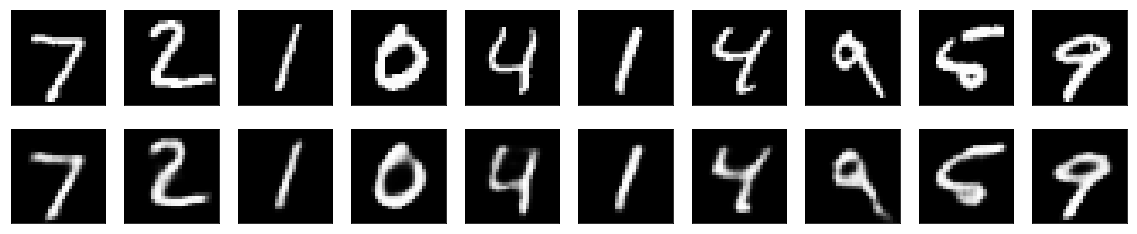

In [39]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i +1+ n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [40]:
e=encoded.eval({input_img:x_test})

In [50]:
test=e[1]
e[0,:,:,1].shape

(4, 4)

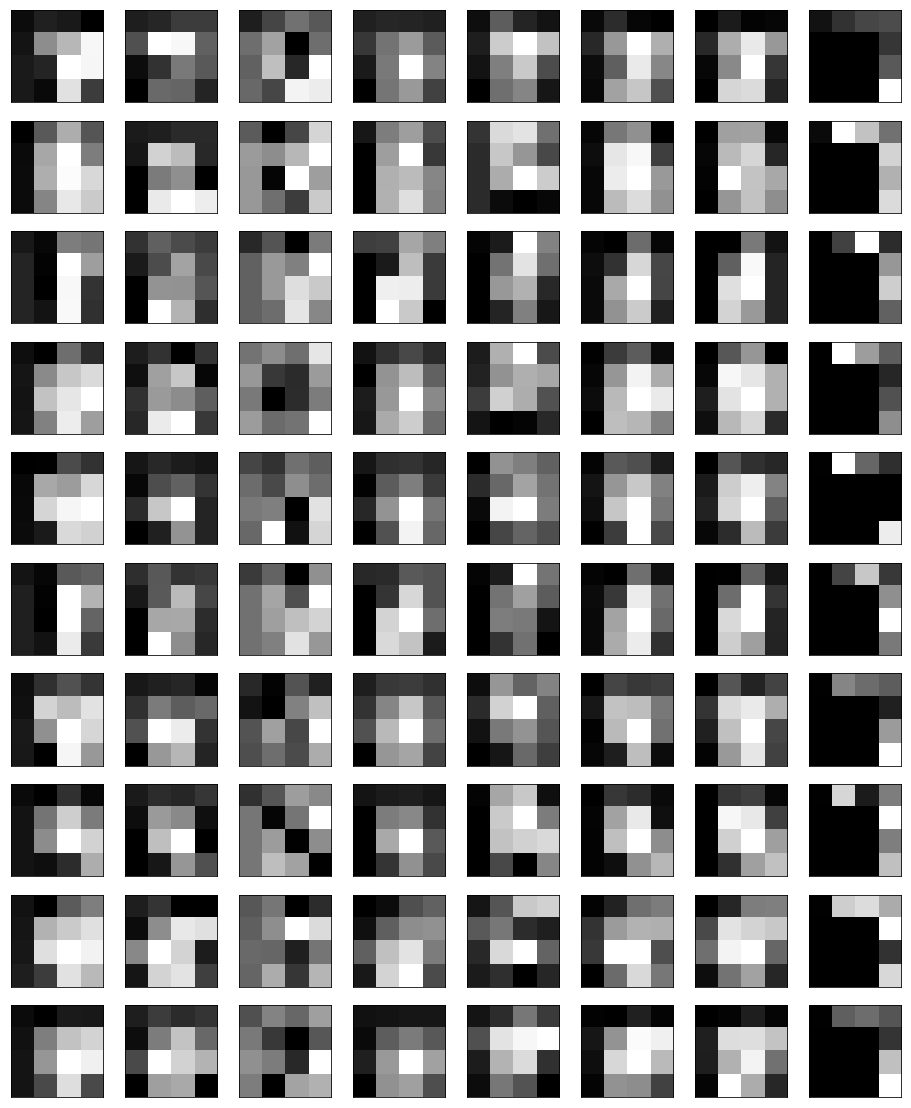

In [55]:
n = 8
plt.figure(figsize=(16, 20))
for j in range(10):    
    for i in range(8):

        ax = plt.subplot(10, n, (j*n)+i+1)
        plt.imshow(e[j,:,:,i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()    